# Algoritmos com loop `for`

Variáveis somadoras (ou, acumuladoras)

In [ ]:
for i in range(0, 100, 10):
    print(i)

In [ ]:
for i in range(5):
    print('Oi')

In [1]:
lista = [0, 2, 4, 6, 8, 10]
soma = 0
for num in lista:
    soma = soma + num

print("Soma:", soma)

Soma: 30


In [ ]:
lista = [0, 2, 4, 6, 8, 10]
for i in range(len(lista)):
    print(lista[i])

Variáveis contadoras

In [7]:
lista = [0, 2, 4, 6, 8, 10]
quantidade = 0
for num in lista:
    quantidade = quantidade + 1

print("Quantidade:", quantidade)

Quantidade: 6


## Alguns métodos para listas 

In [ ]:
lista.append(4) # adiciona um elemento ao final da lista
print(lista)
lista.pop() # remove o último elemento da lista e retorna seu valor
lista.count(4) # conta quantos elementos há na lista de valor igual ao passado como parâmetro
#insert(p, v)
lista.insert(5,0) # insere na posição `p` o valor `v`

In [2]:
nomes = ["Lucas", "Fernanda", "Marcelo"]
nomes.pop()
print(nomes)

['Lucas', 'Fernanda']


In [3]:
nomes = ["Lucas", "Fernanda", "Marcelo"]
nomes.append("Roberto")
print(nomes)

['Lucas', 'Fernanda', 'Marcelo', 'Roberto']


In [5]:
nomes = ["Lucas", "Fernanda", "Marcelo"]
nomes.insert(1, "Roberto")
print(nomes)

['Lucas', 'Roberto', 'Fernanda', 'Marcelo']


In [6]:
nomes = ["Lucas", "Fernanda", "Marcelo"]
for i in range(len(nomes)):
    # print(nomes.pop())
    nomes.pop()
print(nomes)

[]


In [12]:
from IPython.display import HTML

nomes = ["João", "André", "Silvia"]

itens = ''

for nome in nomes:
    itens = itens + f'<li> {nome} </li>'

lista = '''
<ol>
    %s
</ol>
'''

HTML(lista % itens)

## Algoritmos com `for` usando biblioteca de gráficos do Python (PIL)

Primeiro criamos uma imagem em branco.

Para isso, usamos o método `new` de `Image`. Precisamos definir qual o `modo de cor` da imagem (1 só cor, monocromático, RGB ou RGB com transparência) e também as dimensões da imagem, usando uma `tupla` com os valores da largura e da altura da imagem em pixels.

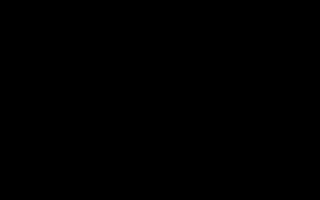

In [30]:
from PIL import Image, ImageDraw
import random

img = Image.new("RGB", (320,200))

img

Outros modos de cor possíveis são:
- '1' - 1bit de cor: só preto ou branco
- 'L' - monocromático - até 256 níveis de luminosidade
- 'RGB' - 3 canais de cor: vermelho, verde e azul - cada canal com até 256 níveis de luminosidade
- 'RGBA' - igual ao RGB mas acrescentando um canal *alfa* com informações de transparência

## Desenhando uma linha

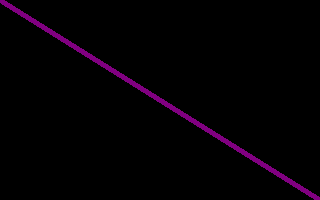

In [31]:

des = ImageDraw.Draw(img)

des.line((0,0,320,200), 'purple', 5)

img

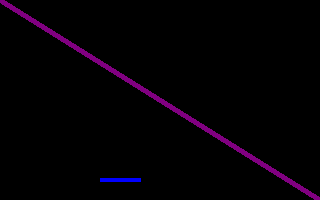

In [32]:
des.line((140,180,100,180), 'blue', 4)
img

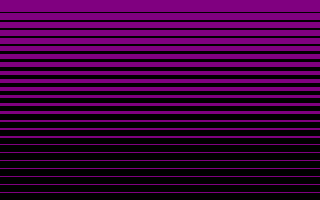

In [34]:
from PIL import Image, ImageDraw

img = Image.new("RGB", (320,200))
des = ImageDraw.Draw(img)

x1 = 0
x2 = 320

y1=y2 = 0

w = 8

for i in range(0,200,8):
    des.line((x1, y1+i, x2, y2+i), 'purple', int(w))
    w=w-0.35
img

## Adicionando texto

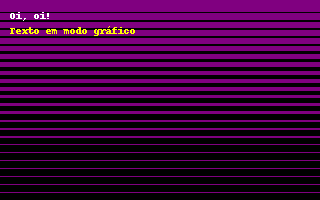

In [35]:
from PIL import ImageFont

fonte = ImageFont.load_default()

des.text((10, 10), "Oi, oi!", 'white', fonte,)
des.text((10, 25), "Texto em modo gráfico", 'yellow', fonte)

img

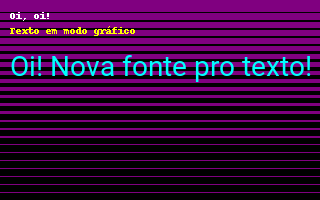

In [37]:
fonte = ImageFont.truetype("fonts/Roboto-Regular_1.ttf",28)
des.text((10,50), 'Oi! Nova fonte pro texto!', 'cyan', fonte)
img

## Uma lista de pixels forma uma imagem

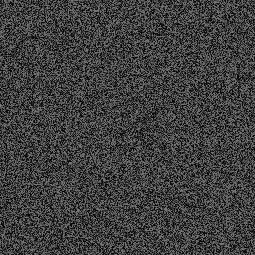

In [6]:
from PIL import Image
import random

pixels_da_imagem = []

for linha in range(255):
    for pixel_na_linha in range(255):
        pixels_da_imagem.append(random.randrange(0,128))

imagem = Image.new("L", (255,255))
imagem.putdata(pixels_da_imagem)

imagem

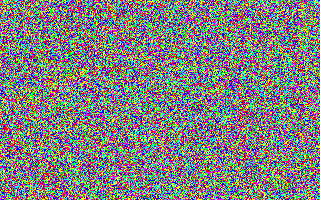

In [7]:
from PIL import Image
import random

largura = 320
altura = 200

pixels_da_imagem = []
paleta_de_cores = [(255,0,0), (0,255,0), (0,0,255), (255,0,255), (255,255,0), (0,255,255)]
for linha in range(altura):
    for pixel_na_linha in range(largura):
        pixels_da_imagem.append(random.choice(paleta_de_cores))

imagem = Image.new("RGB", (largura, altura))
imagem.putdata(pixels_da_imagem)

imagem

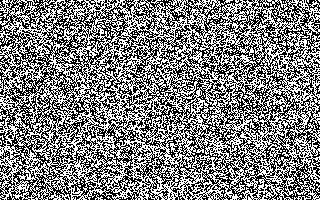

In [8]:
from PIL import Image

pixels = []
imagem = Image.new("1", (largura, altura))

for y in range(altura):
    for x in range(largura):
        pixels.append(random.choice([0,1]))


imagem.putdata(pixels)


imagem

## Desenhando uma grade

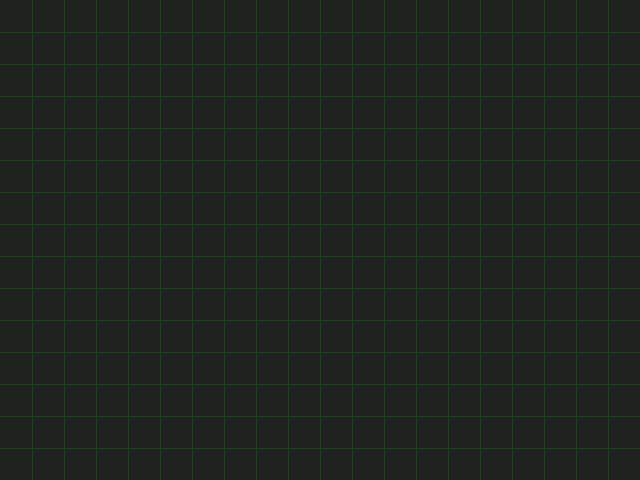

In [49]:

from PIL import Image, ImageDraw

largura = 640
altura = 480
cor_fundo = (32,34,32) # preto com um tantinho de verde
cor_grade = (32,64,32) # verde escuro

img = Image.new("RGB",(largura, altura), color=cor_fundo)
desenho = ImageDraw.Draw(img, "RGB")


# Grade
for x in range(32, largura, 32):    
    desenho.line((x, 0, x, altura), width=1, fill=cor_grade)
for y in range(32, altura, 32):    
    desenho.line((0, y, largura, y), width=1, fill=cor_grade)


img

## Ladrilhos

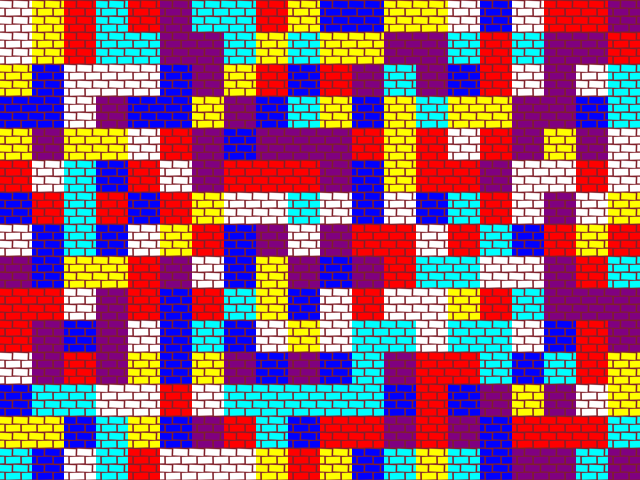

In [48]:
from PIL import Image, ImageDraw
import random

largura = 640
altura = 480
cores = ["purple", "yellow", "red", "blue", "cyan", "white"]

img_fundo = Image.new("RGBA", (largura, altura), color = (128,32,42))
img_ladrilho = Image.open("img/pattern_21.png").resize((32,32))

des_fundo  = ImageDraw.Draw(img_fundo,"RGBA")

altura_t = img_ladrilho.height
largura_t = img_ladrilho.height

for y in range(0, altura, altura_t):
    for x in range(0, largura, largura_t):
        des_fundo.bitmap((x,y), bitmap=img_ladrilho, fill=random.choice(cores))


img_fundo